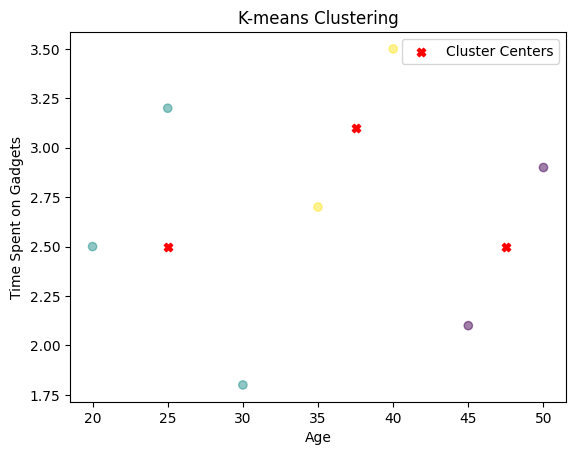

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

df = pd.read_csv('age.csv')
# Selecting the 'Age' and 'Time_Spent' columns correctly
X = df[['Age', 'Time_Spent']] # Use a list of column names instead of a tuple
k = 3

kmeans = KMeans(n_clusters=k)
kmeans.fit(X)

centers = kmeans.cluster_centers_
labels = kmeans.labels_

plt.scatter(df['Age'], df['Time_Spent'], c=labels, cmap='viridis', alpha=0.5)
plt.scatter(centers[:, 0], centers[:, 1], c='red', marker='X', label='Cluster Centers') # Fixed: label instead of labels
plt.xlabel('Age')
plt.ylabel('Time Spent on Gadgets')
plt.title('K-means Clustering')
plt.legend()
plt.show()

In [ ]:
import pandas as pd
from scipy.stats import f_oneway

df = pd.read_csv('ANOVA.csv')

score_A=df[df['Group']=='A']['Score']
score_B=df[df['Group']=='B']['Score']
score_C=df[df['Group']=='C']['Score']

f_statistic, p_value = f_oneway(score_A, score_B, score_C)

print(f"F-statistic: {f_statistic}")
print(f"P-value: {p_value}")

alpha = 0.05

if p_value < alpha:
    print("Reject the null hypothesis. There is a significant difference among the groups.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference among the groups.")

F-statistic: 776.5757575758433
P-value: 8.464553654235198e-05
Reject the null hypothesis. There is a significant difference among the groups.


Calculating Silhouette Scores for k=2 to 5:
k=2, Silhouette Score: 0.681
k=3, Silhouette Score: 0.553
k=4, Silhouette Score: 0.498
k=5, Silhouette Score: 0.491


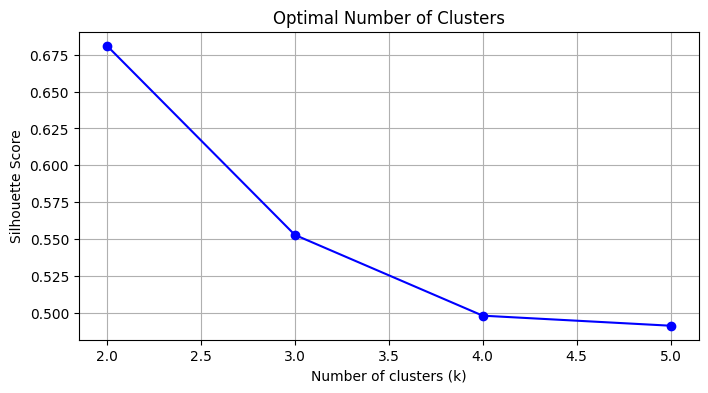


Applying K-means with k=3...


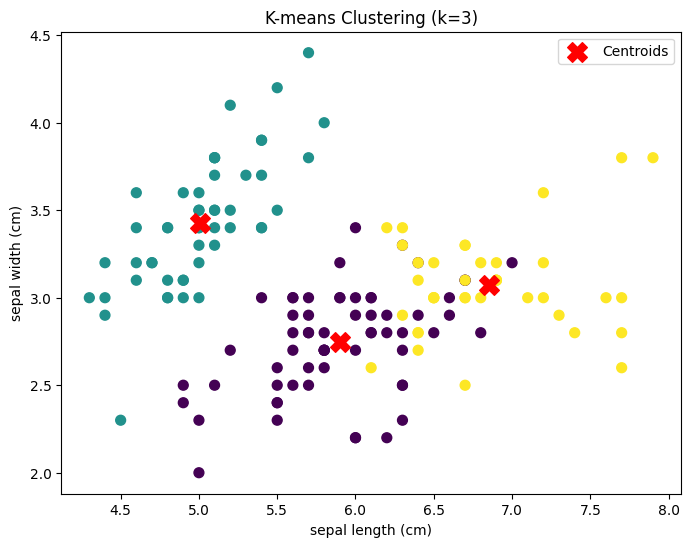


Cluster Means:
         sepal length (cm)  sepal width (cm)  petal length (cm)  \
Cluster                                                           
0                     5.90              2.75               4.39   
1                     5.01              3.43               1.46   
2                     6.85              3.07               5.74   

         petal width (cm)  
Cluster                    
0                    1.43  
1                    0.25  
2                    2.07  

Generating pairplot...


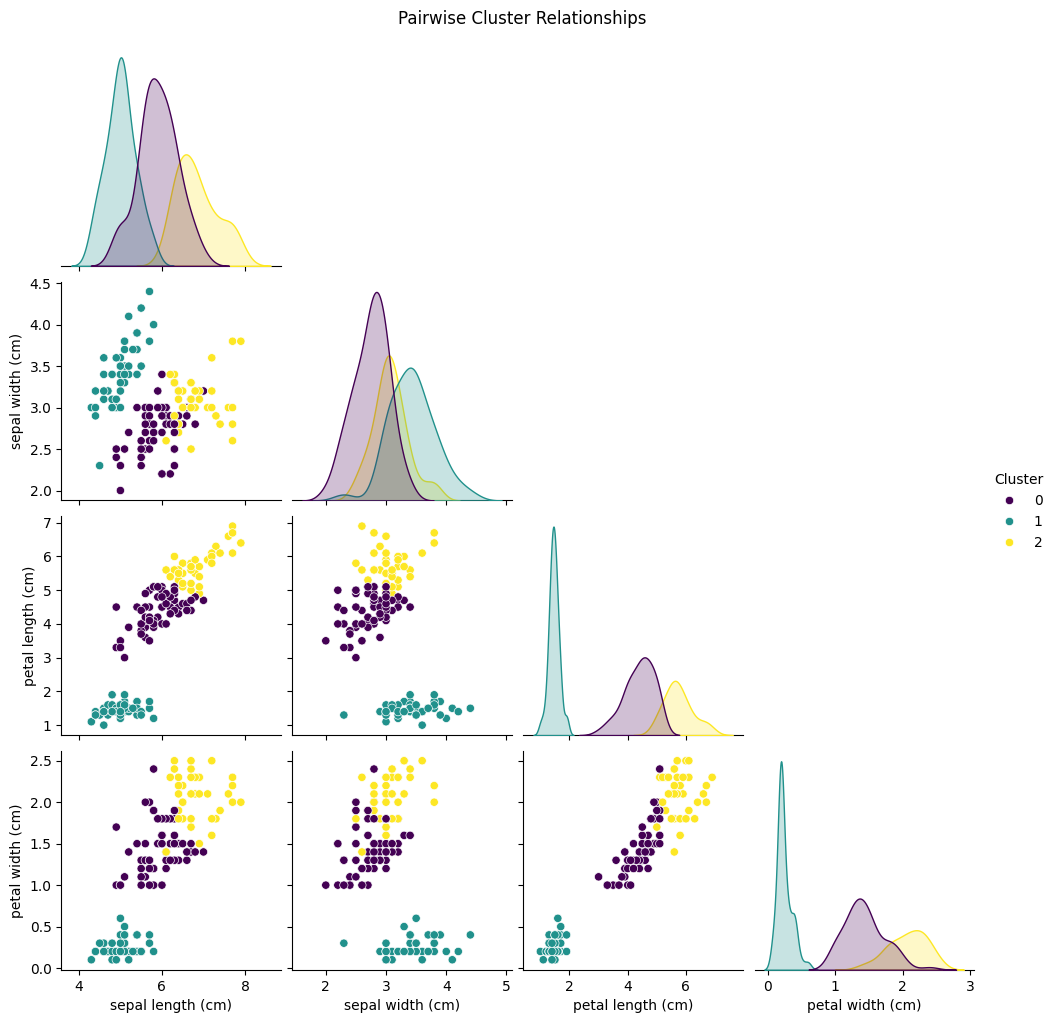

In [1]:

# Import libraries
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Load data
iris = load_iris()
X = iris.data
feature_names = iris.feature_names

# Silhouette Analysis
print("Calculating Silhouette Scores for k=2 to 5:")
silhouette_scores = []
for k in range(2, 6):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X)
    score = silhouette_score(X, labels)
    silhouette_scores.append(score)
    print(f"k={k}, Silhouette Score: {score:.3f}")

# Plot Silhouette Scores
plt.figure(figsize=(8,4))
plt.plot(range(2,6), silhouette_scores, 'bo-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Optimal Number of Clusters')
plt.grid(True)
plt.show()

# Apply K-means with best k
best_k = 3
print(f"\nApplying K-means with k={best_k}...")
kmeans = KMeans(n_clusters=best_k, random_state=42, n_init=10)
clusters = kmeans.fit_predict(X)

# Visualize clusters
plt.figure(figsize=(8,6))
plt.scatter(X[:,0], X[:,1], c=clusters, cmap='viridis', s=50)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1],
            s=200, c='red', marker='X', label='Centroids')
plt.xlabel(feature_names[0])
plt.ylabel(feature_names[1])
plt.title('K-means Clustering (k=3)')
plt.legend()
plt.show()

# Analyze clusters
df = pd.DataFrame(X, columns=feature_names)
df['Cluster'] = clusters
print("\nCluster Means:")
print(df.groupby('Cluster').mean().round(2))

# Pairplot
print("\nGenerating pairplot...")
sns.pairplot(df, hue='Cluster', palette='viridis', corner=True)
plt.suptitle('Pairwise Cluster Relationships', y=1.02)
plt.show()